<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT

## Title : Exe26 - Clusters of Grain

#### Name: Chuay Xiang Ze

#### IC Number: 021224070255

#### Date : 1/8/2023

#### Introduction : Learning how to cluster in real datasets



#### Conclusion : Managed to complete tasks relating to the topic.






# How many clusters of grain?

This exercise is taken and modified from https://github.com/benjaminwilson/python-clustering-exercises

This is a class to choose a good number of clusters for a dataset using the k-means inertia graph.  You are given a dataset of the measurements of samples of grain.  What's a good number of clusters in this case?

This dataset was obtained from the [UCI](https://archive.ics.uci.edu/ml/datasets/seeds).


**Step 1:** Load the dataset _(written for you)_.

In [2]:
import pandas as pd

seeds_df = pd.read_csv('./seeds.csv')
# forget about the grain variety for the moment - we'll use this later
del seeds_df['grain_variety']

**Step 2:** Display the DataFrame to inspect the data.  Notice that there are 7 columns - so each grain sample (row) is a point in 7D space!  Scatter plots can't help us here.

In [3]:
seeds_df

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


**Step 3:** Extract the measurements from the DataFrame using its `.values` attribute:

In [4]:
measurements = seeds_df.values

**Step 4:**  _(Written for you)_. Measure the quality of clusterings with different numbers of clusters using the
inertia.  For each of the given values of `k`, perform the following steps:

  - Create a `KMeans` instance called `model` with `k` clusters.
  - Fit the model to the grain data `samples`.
  - Append the value of the `inertia_` attribute of `model` to the list `inertias`.

C:\Anaconda\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on 

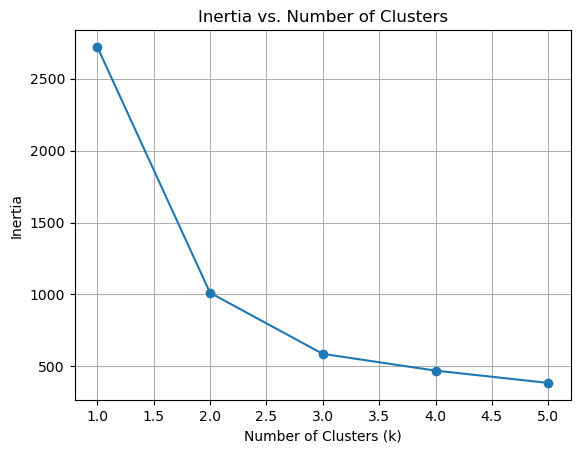

In [5]:
from sklearn.cluster import KMeans

# Define a list to store the inertia values for different numbers of clusters
inertias = []

# Define the range of clusters you want to test (e.g., from 1 to 10 clusters)
num_clusters_range = range(1, 6)

# Loop through the range of clusters and compute the inertia for each k
for k in num_clusters_range:
    # Create a KMeans instance with k clusters
    model = KMeans(n_clusters=k, random_state=0) 
    
    # Fit the model to the grain data samples
    model.fit(measurements)
    
    # Append the inertia value to the list 'inertias'
    inertias.append(model.inertia_)

import matplotlib.pyplot as plt

# Plot the inertia values against the number of clusters
plt.plot(num_clusters_range, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.grid(True)
plt.show()

**Step 5:**  Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

In [23]:
model.inertia_

201.39807107056689

**Excellent work!** You can see from the graph the "best" number of clusters. Use this value for the next steps.

**Step 6:** Create a `KMeans` model called `model` with the best value from the above steps.

In [6]:
model = KMeans(n_clusters = 3)

**Step 7:** Use the .fit_predict() method of model to fit it to samples and derive the cluster labels.

Calling .fit_predict() is the same as calling .fit() and then calling .predict().

In [10]:
labels = model.fit_predict(measurements)
labels

C:\Anaconda\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

**Step 8:** Create a DataFrame `df` with two columns named `'labels'` and `'varieties'`, using `labels` and `varieties`, respectively, for the column values.

In [11]:
new_df = pd.read_csv('./seeds.csv')
varieties = new_df['grain_variety']

df = pd.DataFrame({'labels': labels, 'varieties': varieties})
df

,labels,varieties
0,2,Kama wheat
1,2,Kama wheat
2,2,Kama wheat
3,2,Kama wheat
4,2,Kama wheat
...,...,...
205,0,Canadian wheat
206,0,Canadian wheat
207,0,Canadian wheat
208,0,Canadian wheat


**Step 9:** Use the `pd.crosstab()` function on `df['labels']` and `df['varieties']` to count the number of times each grain variety coincides with each cluster label. Assign the result to `ct`.

In [16]:
ct = pd.crosstab(df['labels'], df['varieties'])

**Step 10:** Display `ct` by evaluating it - and inspect your cross-tabulation!  You'll see that your clustering is pretty good.

In [15]:
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,68,9,0
1,0,1,60
2,2,60,10


Now you are done. If you wish, you can also try to plot the clusters to visualize it.


C:\Anaconda\envs\python-dscourse\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


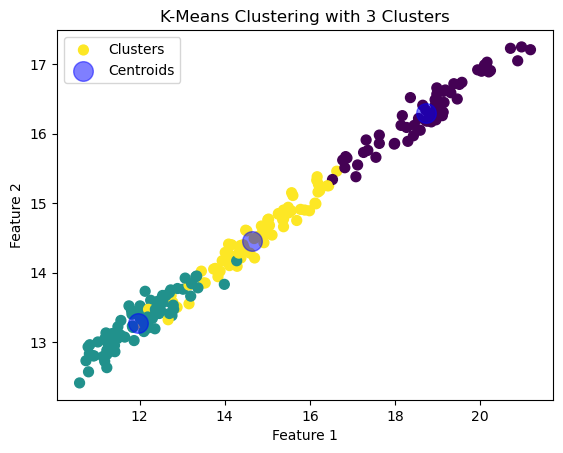

In [23]:
kmeans = KMeans(n_clusters=best_k, init='k-means++', max_iter=300, n_init=10, random_state=0)

y_kmeans = kmeans.fit_predict(measurements)

plt.scatter(measurements[:, 0], measurements[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Clusters')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='blue', s=200, alpha=0.5, label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-Means Clustering with {best_k} Clusters')

plt.legend()
plt.show()